In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

In [50]:
# Read and clean data
ref_df = pd.read_csv("../data/UNdata_refugees.csv", skipfooter=3, engine='python')
ref_df = ref_df[["Country or territory of asylum or residence", "Country or territory of origin", 
                      "Year", "Refugees<sup>*</sup>"]]
ref_df = ref_df.rename({"Country or territory of asylum or residence": "asylum", 
                        "Country or territory of origin": "origin", 
                        "Refugees<sup>*</sup>": "refugees"}, axis="columns").dropna()
ref_df["Year"] = ref_df["Year"].astype(int)
ref_df["refugees"] = ref_df["refugees"].astype(int)

In [3]:
ref_df.head(5)

,asylum,origin,Year,refugees
0,Afghanistan,Iraq,2016,1.0
1,Afghanistan,Islamic Rep. of Iran,2016,33.0
2,Afghanistan,Pakistan,2016,59737.0
3,Albania,China,2016,11.0
4,Albania,Dem. Rep. of the Congo,2016,3.0


In [4]:
ref_df[(ref_df["Year"] == 1975) & (ref_df["origin"] != "Various")]\
    .groupby("origin").sum().sort_values("refugees", ascending=False).head(10)

,Year,refugees
origin,,
Angola,9875,501830.0
Guinea,1975,300000.0
Rwanda,9875,175720.0
Burundi,5925,141940.0
Ethiopia,5925,91410.0
Equatorial Guinea,3950,90000.0
Lao People's Dem. Rep.,1975,55510.0
Guinea-Bissau,1975,46000.0
Dem. Rep. of the Congo,7900,39410.0


In [5]:
for x in range(1975, 2017):
    print("*******************", x, "*******************")
    print(ref_df[(ref_df["Year"] == x) & (ref_df["origin"] != "Various")][["origin", "refugees"]]\
                .groupby("origin").sum().sort_values("refugees", ascending=False).head(3)
        )

******************* 1975 *******************
        refugees
origin          
Angola  501830.0
Guinea  300000.0
Rwanda  175720.0
******************* 1976 *******************
        refugees
origin          
Guinea  500000.0
Angola  499190.0
Rwanda  176410.0
******************* 1977 *******************
                        refugees
origin                          
Ethiopia                655350.0
Angola                  529830.0
Dem. Rep. of the Congo  264940.0
******************* 1978 *******************
          refugees
origin            
Ethiopia  887670.0
Angola    646110.0
Rwanda    175110.0
******************* 1979 *******************
              refugees
origin                
Ethiopia     1623870.0
Angola        652980.0
Afghanistan   500000.0
******************* 1980 *******************
              refugees
origin                
Ethiopia     2567998.0
Afghanistan  1734921.0
Angola        449030.0
******************* 1981 *******************
              refugees
or

In [6]:
for x in range(1975, 2017):
    print("*******************", x, "*******************")
    print(ref_df[(ref_df["Year"] == x) & (ref_df["asylum"] != "Various")][["asylum", "refugees"]]\
                .groupby("asylum").sum().sort_values("refugees", ascending=False).head(3)
        )

******************* 1975 *******************
                        refugees
asylum                          
United States           530000.0
Dem. Rep. of the Congo  510000.0
Côte d'Ivoire           300000.0
******************* 1976 *******************
                        refugees
asylum                          
Lebanon                 700000.0
Dem. Rep. of the Congo  515000.0
Côte d'Ivoire           500070.0
******************* 1977 *******************
                        refugees
asylum                          
Lebanon                 700000.0
United States           684700.0
Dem. Rep. of the Congo  530300.0
******************* 1978 *******************
                        refugees
asylum                          
United States           734000.0
Dem. Rep. of the Congo  653000.0
Somalia                 600000.0
******************* 1979 *******************
                         refugees
asylum                           
Somalia                 1175190.0
United States

           refugees
asylum             
Turkey    2869421.0
Pakistan  1352560.0
Lebanon   1012969.0


In [7]:
ref_df[(ref_df["Year"] == 1975) & (ref_df["refugees"] >= 5000) & (ref_df["origin"] != "Various")]

,asylum,origin,Year,refugees
95955,Algeria,Western Sahara,1975,20000.0
95957,Argentina,Chile,1975,14400.0
95968,Burundi,Rwanda,1975,49500.0
95969,Cameroon,Equatorial Guinea,1975,30000.0
95973,Congo,Angola,1975,5000.0
95974,Côte d'Ivoire,Guinea,1975,300000.0
95975,Dem. Rep. of the Congo,Angola,1975,460000.0
95976,Dem. Rep. of the Congo,Burundi,1975,24000.0
95977,Dem. Rep. of the Congo,Rwanda,1975,24300.0
95982,Ethiopia,Sudan,1975,11000.0


In [8]:
ref_df[ref_df["Year"] == 1975].sort_values("refugees").iloc[-3,:]

asylum      Dem. Rep. of the Congo
origin                      Angola
Year                          1975
refugees                  460000.0
Name: 95975, dtype: object

In [9]:
origin_lst = ref_df[(ref_df["Year"] == 1975) & (ref_df["origin"] != "Various") & (ref_df["asylum"] != "Various")]\
    .groupby("origin").sum().sort_values("refugees", ascending=False).index

In [10]:
display(HTML("<h1>1975 Refugees Origin Countries</h1> (sorted descending)"))
for x in origin_lst:
    value = int(ref_df[(ref_df["Year"] == 1975) & (ref_df["origin"] == x)].groupby("origin").sum()["refugees"][0])
    display(HTML(f"<b>{x} --- {value:15,}</b>"))
    country_ref_df = ref_df[(ref_df["origin"] == x) & (ref_df["Year"] == 1975)]\
          .sort_values("refugees", ascending=False)[["asylum", "refugees"]]
    display(country_ref_df)

,asylum,refugees
95975,Dem. Rep. of the Congo,460000.0
96049,Zambia,30040.0
95973,Congo,5000.0
96047,Various,5000.0
95962,Botswana,1790.0


,asylum,refugees
95974,Côte d'Ivoire,300000.0


,asylum,refugees
96034,Uganda,78120.0
95968,Burundi,49500.0
95977,Dem. Rep. of the Congo,24300.0
96041,United Rep. of Tanzania,23100.0
95994,Kenya,700.0


,asylum,refugees
96037,United Rep. of Tanzania,110540.0
95976,Dem. Rep. of the Congo,24000.0
96015,Rwanda,7400.0


,asylum,refugees
96020,Sudan,91000.0
95991,Kenya,300.0
96052,Zambia,110.0


,asylum,refugees
95985,Gabon,60000.0
95969,Cameroon,30000.0


,asylum,refugees
96025,Thailand,55510.0


,asylum,refugees
96016,Senegal,46000.0


,asylum,refugees
96033,Uganda,34450.0
96019,Sudan,4500.0
96038,United Rep. of Tanzania,400.0
96051,Zambia,60.0


,asylum,refugees
96040,United Rep. of Tanzania,33700.0
95992,Kenya,600.0
96056,Zambia,450.0


,asylum,refugees
96006,Mozambique,30000.0
96055,Zambia,270.0
96039,United Rep. of Tanzania,80.0


,asylum,refugees
95955,Algeria,20000.0


,asylum,refugees
96024,Thailand,18830.0


,asylum,refugees
95957,Argentina,14400.0
96012,Peru,600.0
95953,Algeria,350.0


,asylum,refugees
96008,Mozambique,14500.0
95966,Botswana,80.0
96045,United Rep. of Tanzania,80.0
95997,Kenya,60.0


,asylum,refugees
95982,Ethiopia,11000.0


,asylum,refugees
96009,Nepal,8200.0


,asylum,refugees
96057,Zambia,3720.0
95964,Botswana,150.0
95993,Kenya,100.0


,asylum,refugees
96043,United Rep. of Tanzania,2300.0
96060,Zambia,210.0


,asylum,refugees
96026,Thailand,1420.0
96013,Philippines,690.0


,asylum,refugees
96059,Zambia,760.0
95965,Botswana,190.0
95999,Lesotho,190.0
95995,Kenya,90.0
96007,Mozambique,70.0
96042,United Rep. of Tanzania,60.0


,asylum,refugees
95979,Dem. Rep. of the Congo,750.0


,asylum,refugees
95958,Argentina,570.0


,asylum,refugees
95988,Greece,510.0


,asylum,refugees
96027,Turkey,380.0


,asylum,refugees
95963,Botswana,190.0
96054,Zambia,120.0


,asylum,refugees
96028,Turkey,300.0


,asylum,refugees
96004,Morocco,140.0


,asylum,refugees
96001,Morocco,70.0
96029,Turkey,70.0


,asylum,refugees
96031,Turkey,120.0


,asylum,refugees
96058,Zambia,110.0


,asylum,refugees
96050,Zambia,110.0


,asylum,refugees
96053,Zambia,90.0


,asylum,refugees
95956,Argentina,90.0


,asylum,refugees
96003,Morocco,70.0


,asylum,refugees
96030,Turkey,70.0


,asylum,refugees
96002,Morocco,60.0


,asylum,refugees
96000,Morocco,50.0


In [55]:
# .style.format('{:,}')
for x in range(1975,2017):
    print(f"*************** {x} *************")
    display(pd.DataFrame(ref_df[ref_df["Year"] == x].groupby("asylum")\
             .sum().drop("Year", axis=1).sort_values("refugees", ascending = False)["refugees"]).style.format('{:,}'))

*************** 1975 *************


,refugees
asylum,
Various,"754,120"
United States,"530,000"
Dem. Rep. of the Congo,"510,000"
Côte d'Ivoire,"300,000"
United Rep. of Tanzania,"171,160"
United Kingdom,"153,000"
Germany,"122,000"
Uganda,"112,630"
France,"109,882"


*************** 1976 *************


,refugees
asylum,
Lebanon,"700,000"
Various,"603,300"
Dem. Rep. of the Congo,"515,000"
Côte d'Ivoire,"500,070"
United States,"500,000"
United Rep. of Tanzania,"154,000"
United Kingdom,"153,000"
Germany,"122,000"
France,"114,634"


*************** 1977 *************


,refugees
asylum,
Lebanon,"700,000"
United States,"684,700"
Dem. Rep. of the Congo,"530,300"
Somalia,"500,000"
Angola,"235,000"
United Rep. of Tanzania,"164,610"
Sudan,"150,000"
United Kingdom,"148,000"
Various,"123,200"


*************** 1978 *************


,refugees
asylum,
United States,"734,000"
Dem. Rep. of the Congo,"653,000"
Somalia,"600,000"
Australia,"304,000"
Sudan,"270,000"
Bangladesh,"164,000"
United Rep. of Tanzania,"160,960"
Various,"152,040"
Viet Nam,"150,000"


*************** 1979 *************


,refugees
asylum,
Somalia,"1,175,190"
United States,"734,000"
Dem. Rep. of the Congo,"710,480"
Pakistan,"400,000"
Sudan,"351,700"
Australia,"304,000"
China,"250,000"
Various,"169,490"
United Rep. of Tanzania,"160,820"


*************** 1980 *************


,refugees
asylum,
Somalia,"2,000,000"
Pakistan,"1,428,230"
Dem. Rep. of the Congo,"611,110"
Sudan,"493,000"
United States,"403,684"
Islamic Rep. of Iran,"330,000"
Australia,"304,000"
China,"263,000"
Thailand,"261,360"


*************** 1981 *************


,refugees
asylum,
Pakistan,"2,375,330"
Islamic Rep. of Iran,"1,565,000"
Somalia,"700,000"
Dem. Rep. of the Congo,"576,740"
Sudan,"553,000"
United States,"537,375"
Australia,"317,000"
China,"265,000"
Burundi,"234,590"


*************** 1982 *************


,refugees
asylum,
Pakistan,"2,877,480"
Islamic Rep. of Iran,"1,700,060"
Somalia,"700,000"
Sudan,"637,000"
United States,"620,257"
Dem. Rep. of the Congo,"497,600"
Australia,"317,000"
China,"272,100"
Burundi,"253,170"


*************** 1983 *************


,refugees
asylum,
Pakistan,"2,901,360"
Islamic Rep. of Iran,"1,900,060"
Somalia,"700,000"
Sudan,"690,000"
United States,"655,532"
Australia,"317,000"
Dem. Rep. of the Congo,"303,500"
China,"276,630"
Burundi,"253,820"


*************** 1984 *************


,refugees
asylum,
Pakistan,"2,500,000"
Islamic Rep. of Iran,"2,000,000"
Sudan,"971,000"
Somalia,"701,300"
United States,"626,909"
Dem. Rep. of the Congo,"337,330"
China,"279,750"
Burundi,"273,810"
Ethiopia,"180,480"


*************** 1985 *************


,refugees
asylum,
Pakistan,"2,732,440"
Islamic Rep. of Iran,"2,300,000"
Sudan,"1,164,000"
Somalia,"812,000"
United States,"492,806"
Germany,"475,000"
Dem. Rep. of the Congo,"283,000"
China,"279,670"
Burundi,"267,440"


*************** 1986 *************


,refugees
asylum,
Pakistan,"2,882,100"
Islamic Rep. of Iran,"2,590,000"
Sudan,"974,200"
Somalia,"700,000"
Various,"605,400"
Germany,"547,900"
United States,"398,633"
Dem. Rep. of the Congo,"301,230"
China,"281,790"


*************** 1987 *************


,refugees
asylum,
Pakistan,"3,159,000"
Islamic Rep. of Iran,"2,760,000"
Somalia,"840,100"
Sudan,"807,070"
Germany,"596,200"
Various,"459,400"
Malawi,"401,640"
United States,"365,726"
Dem. Rep. of the Congo,"320,000"


*************** 1988 *************


,refugees
asylum,
Pakistan,"3,257,577"
Islamic Rep. of Iran,"2,850,000"
Somalia,"834,000"
Sudan,"745,000"
Ethiopia,"679,532"
Malawi,"628,133"
Germany,"610,200"
United States,"377,771"
Mexico,"356,400"


*************** 1989 *************


,refugees
asylum,
Pakistan,"3,275,715"
Islamic Rep. of Iran,"2,850,000"
Malawi,"822,503"
Somalia,"769,630"
Sudan,"767,729"
Ethiopia,"710,166"
Germany,"628,500"
United States,"411,498"
Mexico,"356,507"


*************** 1990 *************


,refugees
asylum,
Islamic Rep. of Iran,"4,174,401"
Pakistan,"3,255,975"
Sudan,"1,031,050"
Malawi,"926,725"
Germany,"816,000"
Ethiopia,"773,764"
United States,"464,887"
Somalia,"460,000"
Dem. Rep. of the Congo,"416,435"


*************** 1991 *************


,refugees
asylum,
Islamic Rep. of Iran,"4,404,995"
Pakistan,"3,099,891"
Malawi,"981,812"
Germany,"821,500"
Sudan,"729,200"
Guinea,"547,960"
Ethiopia,"529,620"
United States,"513,882"
Dem. Rep. of the Congo,"482,959"


*************** 1992 *************


,refugees
asylum,
Islamic Rep. of Iran,"4,150,723"
Pakistan,"1,629,218"
Germany,"1,236,000"
Malawi,"1,058,498"
Sudan,"725,900"
United States,"579,952"
Serbia (and Kosovo: S/RES/1244 (1999)),"516,430"
Guinea,"478,491"
Ethiopia,"431,824"


*************** 1993 *************


,refugees
asylum,
Islamic Rep. of Iran,"2,495,038"
Pakistan,"1,479,266"
Germany,"1,418,000"
Sudan,"745,200"
Malawi,"713,607"
United States,"623,069"
Guinea,"577,158"
Dem. Rep. of the Congo,"572,070"
United Rep. of Tanzania,"564,520"


*************** 1994 *************


,refugees
asylum,
Islamic Rep. of Iran,"2,236,350"
Dem. Rep. of the Congo,"1,724,365"
Germany,"1,354,600"
Pakistan,"1,055,435"
United Rep. of Tanzania,"883,250"
Sudan,"727,174"
United States,"631,051"
Guinea,"553,244"
Serbia (and Kosovo: S/RES/1244 (1999)),"450,700"


*************** 1995 *************


,refugees
asylum,
Islamic Rep. of Iran,"2,071,988"
Dem. Rep. of the Congo,"1,433,760"
Germany,"1,267,900"
Pakistan,"1,202,493"
United Rep. of Tanzania,"829,671"
Sudan,"674,071"
Guinea,"672,298"
Serbia (and Kosovo: S/RES/1244 (1999)),"650,700"
United States,"623,294"


*************** 1996 *************


,refugees
asylum,
Islamic Rep. of Iran,"2,030,359"
Germany,"1,266,000"
Pakistan,"1,202,703"
Dem. Rep. of the Congo,"675,973"
Guinea,"663,854"
United States,"607,024"
Serbia (and Kosovo: S/RES/1244 (1999)),"563,215"
United Rep. of Tanzania,"498,732"
Sudan,"393,874"


*************** 1997 *************


,refugees
asylum,
Islamic Rep. of Iran,"1,982,553"
Pakistan,"1,202,734"
Germany,"1,049,000"
United Rep. of Tanzania,"570,367"
United States,"563,837"
Serbia (and Kosovo: S/RES/1244 (1999)),"550,061"
Guinea,"435,300"
Sudan,"374,415"
Ethiopia,"323,067"


*************** 1998 *************


,refugees
asylum,
Islamic Rep. of Iran,"1,931,332"
Pakistan,"1,202,462"
Germany,"949,200"
United Rep. of Tanzania,"543,881"
United States,"533,969"
Serbia (and Kosovo: S/RES/1244 (1999)),"502,037"
Guinea,"482,467"
Sudan,"391,496"
Armenia,"310,012"


*************** 1999 *************


,refugees
asylum,
Islamic Rep. of Iran,"1,835,688"
Pakistan,"1,202,015"
Germany,"975,500"
United Rep. of Tanzania,"622,203"
United States,"521,143"
Guinea,"501,544"
Serbia (and Kosovo: S/RES/1244 (1999)),"501,262"
Sudan,"390,995"
Armenia,"296,216"


*************** 2000 *************


,refugees
asylum,
Pakistan,"2,001,466"
Islamic Rep. of Iran,"1,868,000"
Germany,"906,000"
United Rep. of Tanzania,"680,862"
United States,"508,222"
Serbia (and Kosovo: S/RES/1244 (1999)),"484,391"
Guinea,"427,206"
Sudan,"414,928"
Dem. Rep. of the Congo,"332,509"


*************** 2001 *************


,refugees
asylum,
Pakistan,"2,198,797"
Islamic Rep. of Iran,"1,868,000"
Germany,"903,000"
United Rep. of Tanzania,"646,900"
United States,"515,853"
Serbia (and Kosovo: S/RES/1244 (1999)),"400,304"
Dem. Rep. of the Congo,"362,012"
Sudan,"349,209"
China,"295,325"


*************** 2002 *************


,refugees
asylum,
Islamic Rep. of Iran,"1,306,599"
Pakistan,"1,227,433"
Germany,"980,000"
United Rep. of Tanzania,"689,373"
United States,"485,171"
Serbia (and Kosovo: S/RES/1244 (1999)),"354,402"
Dem. Rep. of the Congo,"332,978"
Sudan,"328,176"
China,"297,277"


*************** 2003 *************


,refugees
asylum,
Pakistan,"1,124,298"
Islamic Rep. of Iran,"984,896"
Germany,"960,395"
United Rep. of Tanzania,"649,770"
United States,"452,548"
China,"299,354"
Serbia (and Kosovo: S/RES/1244 (1999)),"291,403"
United Kingdom,"276,521"
Saudi Arabia,"240,835"


*************** 2004 *************


,refugees
asylum,
Pakistan,"1,290,984"
Islamic Rep. of Iran,"1,045,976"
Germany,"876,622"
United Rep. of Tanzania,"602,088"
United States,"420,858"
China,"299,375"
United Kingdom,"298,844"
Serbia (and Kosovo: S/RES/1244 (1999)),"276,683"
Chad,"259,880"


*************** 2005 *************


,refugees
asylum,
Pakistan,"1,084,694"
Islamic Rep. of Iran,"974,302"
Germany,"700,016"
United Rep. of Tanzania,"548,824"
United States,"379,340"
United Kingdom,"303,181"
China,"301,041"
Chad,"275,412"
Uganda,"257,256"


*************** 2006 *************


,refugees
asylum,
Pakistan,"1,044,462"
Islamic Rep. of Iran,"968,370"
United States,"843,490"
Syrian Arab Rep.,"702,209"
Germany,"605,402"
Jordan,"500,229"
United Rep. of Tanzania,"485,295"
United Kingdom,"301,556"
China,"301,027"


*************** 2007 *************


,refugees
asylum,
Syrian Arab Rep.,"1,503,769"
Islamic Rep. of Iran,"963,546"
Pakistan,"887,273"
Germany,"578,879"
Jordan,"500,281"
United Rep. of Tanzania,"435,630"
China,"301,078"
United Kingdom,"299,718"
Chad,"294,017"


*************** 2008 *************


,refugees
asylum,
Syrian Arab Rep.,"1,105,698"
Islamic Rep. of Iran,"980,109"
Pakistan,"765,720"
Germany,"582,735"
Jordan,"500,413"
United Rep. of Tanzania,"321,909"
Kenya,"320,605"
Chad,"302,687"
China,"300,967"


*************** 2009 *************


,refugees
asylum,
Islamic Rep. of Iran,"1,070,488"
Syrian Arab Rep.,"1,054,466"
Pakistan,"759,392"
Germany,"593,799"
Jordan,"450,756"
Kenya,"358,928"
Chad,"314,393"
China,"300,989"
United States,"275,459"


*************** 2010 *************


,refugees
asylum,
Pakistan,"1,900,621"
Islamic Rep. of Iran,"1,073,366"
Syrian Arab Rep.,"1,005,472"
Germany,"594,269"
Jordan,"450,915"
Kenya,"402,905"
Chad,"347,939"
China,"300,986"
United States,"264,569"


*************** 2011 *************


,refugees
asylum,
Pakistan,"1,702,700"
Islamic Rep. of Iran,"886,468"
Syrian Arab Rep.,"755,445"
Germany,"571,684"
Kenya,"566,487"
Jordan,"451,009"
Chad,"366,494"
China,"301,018"
Ethiopia,"288,844"


*************** 2012 *************


,refugees
asylum,
Pakistan,"1,638,456"
Islamic Rep. of Iran,"868,242"
Germany,"589,737"
Kenya,"564,933"
Syrian Arab Rep.,"476,506"
Ethiopia,"376,393"
Chad,"373,695"
Jordan,"302,707"
China,"301,037"


*************** 2013 *************


,refugees
asylum,
Pakistan,"1,616,507"
Islamic Rep. of Iran,"857,354"
Lebanon,"856,546"
Jordan,"641,915"
Turkey,"609,938"
Kenya,"534,938"
Chad,"434,479"
Ethiopia,"433,936"
China,"301,047"


*************** 2014 *************


,refugees
asylum,
Turkey,"1,587,374"
Pakistan,"1,505,525"
Lebanon,"1,154,040"
Islamic Rep. of Iran,"982,027"
Ethiopia,"659,524"
Jordan,"654,141"
Kenya,"551,352"
Chad,"452,897"
Uganda,"385,513"


*************** 2015 *************


,refugees
asylum,
Turkey,"2,541,352"
Pakistan,"1,561,162"
Lebanon,"1,070,854"
Islamic Rep. of Iran,"979,437"
Ethiopia,"736,086"
Jordan,"664,118"
Kenya,"553,912"
Uganda,"477,187"
Dem. Rep. of the Congo,"383,095"


*************** 2016 *************


,refugees
asylum,
Turkey,"2,869,421"
Pakistan,"1,352,560"
Lebanon,"1,012,969"
Islamic Rep. of Iran,"979,435"
Uganda,"940,835"
Ethiopia,"791,631"
Jordan,"685,197"
Germany,"669,482"
Dem. Rep. of the Congo,"451,956"


      refugees
Year          
1975   18830.0
1976   17200.0
1977   76710.0
1978  165120.0
1979   51100.0
1980  192843.0
1981  135077.0
1982  123398.0
1983   91115.0
1984   72468.0
1985   67518.0
1986   54848.0
1987   48589.0
1988   97758.0
1989   75725.0
1990   54364.0
1991   43168.0
1992   28851.0
1993    9753.0
1994    8538.0
1995   61225.0
1996   62244.0
1997  103246.0
1998   76576.0
1999   38320.0
2000   36855.0
2001   34759.0
2002   33456.0
2003   31407.0
2004   18115.0
2005   17806.0
2006   17965.0
2007   17697.0
2008   17245.0
2009   17011.0
2010   16301.0
2011   15184.0
2012   13993.0
2013   13713.0
2014   13062.0
2015   12799.0
2016   12415.0


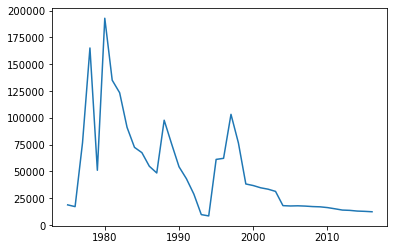

In [37]:
print(ref_df[ref_df["origin"] == "Cambodia"].groupby("Year").sum())
plt.plot(ref_df[ref_df["origin"] == "Cambodia"].groupby("Year").sum())

In [53]:
pd.DataFrame(ref_df[ref_df["Year"] == 1975].groupby("asylum")\
             .sum().drop("Year", axis=1).sort_values("refugees", ascending = False)["refugees"]).style.format('{:,}')

,refugees
asylum,
Various,"754,120"
United States,"530,000"
Dem. Rep. of the Congo,"510,000"
Côte d'Ivoire,"300,000"
United Rep. of Tanzania,"171,160"
United Kingdom,"153,000"
Germany,"122,000"
Uganda,"112,630"
France,"109,882"


In [60]:
ref_df[["asylum", "refugees"]].groupby("asylum").sum().sort_values("refugees", ascending = False).style.format('{:,}')

,refugees
asylum,
Pakistan,"67,983,474"
Islamic Rep. of Iran,"66,945,262"
Germany,"25,914,275"
United States,"20,045,105"
Sudan,"18,718,424"
Dem. Rep. of the Congo,"17,194,654"
United Rep. of Tanzania,"14,451,697"
Somalia,"11,534,802"
China,"11,025,639"


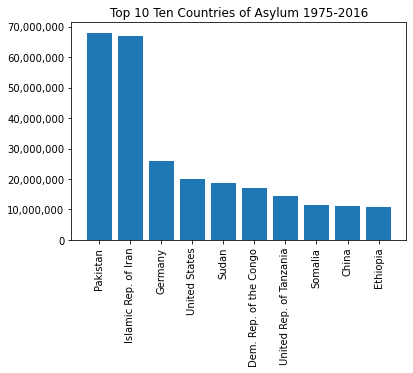

In [72]:
tmp_df = ref_df[["asylum", "refugees"]].groupby("asylum").sum().sort_values("refugees", ascending = False)
plt.bar(tmp_df.index[:10],tmp_df["refugees"][:10])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.title("Top 10 Ten Countries of Asylum 1975-2016")
print()